# cofmpy.utils.Interpolator

This notebook explains the functioning of `cofmpy.utils.Interpolator` class, a wrapper for scipy and numpy 1D interpolation/extrapolation methods.

## A. Registering the unit methods

1. A decorator is defined to register the interpolation operations:

```python
@classmethod
def register(cls, name: str, min_points: int):
    """Class method to register interpolation methods.

    Args:
        name (str): method name
        min_points (int, optional): minimum data points required.

    Registers:
        cls._registry (dict): {method_name: function}
        cls._min_points (dict): {method_name: min_data_len_required}

    Returns:
        decorator (callable): decorator to register methods.
    """

    def decorator(func):
        cls._registry[name] = func
        cls._min_points[name] = min_points
        return func

    return decorator
```
The operations are registered when importing the Interpolator class. 

2. The operations are wrappers for scipy and numpy methods (can be enriched using other libraries)
Upon initialisation, the desired method is passed. Example:

```python
@Interpolator.register("spline", min_points=4)
def interp_spline(
    xp: Iterable, yp: Iterable, x_new: Iterable, method: str = "", **kwargs: dict
):
    """_summary_

    Args:
        xp (Iterable): x coordinates of data points.
        yp (Iterable): y data values.
        x_new (Iterable): x coordinates of points to interpolate.
        method (str): does not apply here. used for registering consistency.
        kwargs (dict): keyword arguments for scipy's make_interp_spline method.

    Returns:
        Iterable: interpolated values for x_new coordinates.
    """
    if len(xp) < 4:
        return np.interp(x_new, xp, yp)
    spline = make_interp_spline(xp, yp, **kwargs)
    return spline(x_new)
```

## B. Initialization

Upon initialisation, the user selects the desired method:

In [1]:
from cofmpy.utils import Interpolator

interp = Interpolator("linear")

INFO:cofmpy.utils:Interpolator initialized with method: linear


## C. Interpolating

The class implements a `__call__` method and works as a callable. 

The inputs are the following:
* xp (scalar|Iterable): x coordinates.
* yp (scalar|Iterable): y values.
* x_new (scalar|Iterable): x values to interpolate.

The output is an array with interpolated values

In [2]:
import numpy as np

xp = np.array([0, 1, 2, 3, 4])
yp = np.array([0, 2, 1, 3, 7])
x_new = np.linspace(-1.5, 5.5, 20)

interp(xp, yp, x_new)[5:10]

array([0.68421053, 1.42105263, 1.92105263, 1.55263158, 1.18421053])

The behaviour when $x$ coordinates for interpolation are selected out of bounds (extrapolation) depends on the registered methods. 

INFO:cofmpy.utils:Interpolator initialized with method: linear


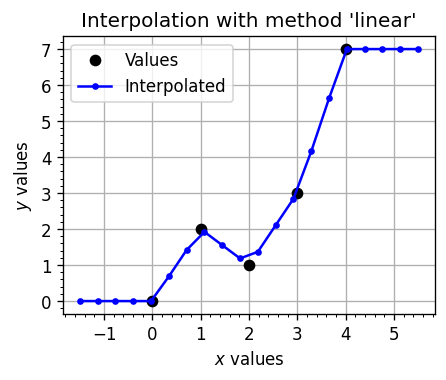

INFO:cofmpy.utils:Interpolator initialized with method: cubic


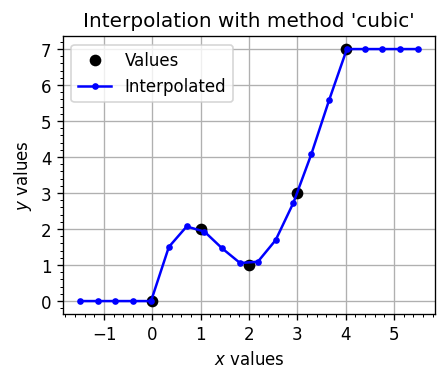

INFO:cofmpy.utils:Interpolator initialized with method: quadratic


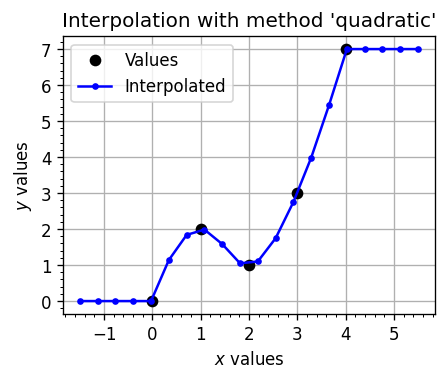

INFO:cofmpy.utils:Interpolator initialized with method: previous


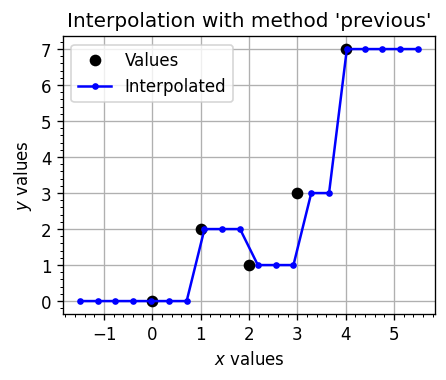

INFO:cofmpy.utils:Interpolator initialized with method: nearest


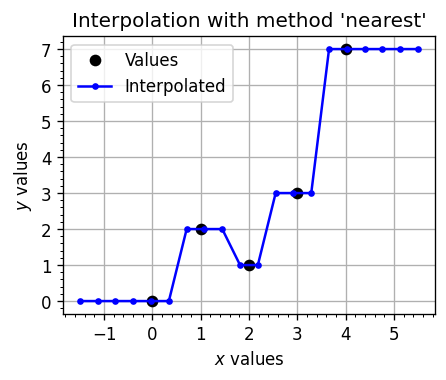

INFO:cofmpy.utils:Interpolator initialized with method: spline


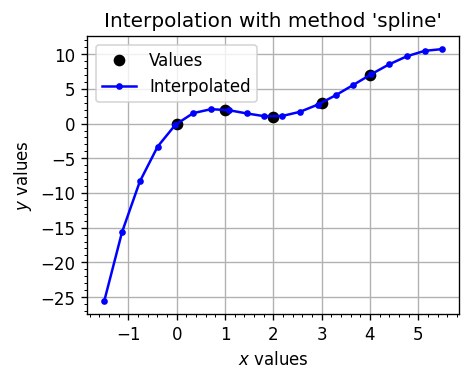

In [3]:
import matplotlib.pyplot as plt

for k in interp._registry.keys():
    i = Interpolator(k)
    if True:
        plt.figure(figsize=(4,3), dpi=120)
        plt.plot(xp, yp, "ko", label="Values")
        plt.plot(x_new, i(xp, yp, x_new), "b.-", label="Interpolated")
        plt.title(f"Interpolation with method '{k}'")
        plt.xlabel("$x$ values")
        plt.ylabel("$y$ values")
        plt.xticks(np.arange(-1, 5.5, 1))
        plt.minorticks_on()
        plt.grid()
        plt.legend()
        plt.show()